In [2]:
import numpy as np
import pandas as pd


In [3]:
train_set = pd.read_csv("C:/Users/a525281/Documents/Python Scripts/pandas/adult_data.csv")
test_set = pd.read_csv("C:/Users/a525281/Documents/Python Scripts/pandas/adult_test.csv")

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set =pd.read_csv(' http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test ', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hr_per_week       32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hr_per_week       16281 non-null int64
native_country    16281 non-null object
income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [8]:
train_set.replace(' ?', np.nan).dropna().shape

(30162, 15)

In [9]:
test_set.replace(' ?', np.nan).dropna().shape

(15060, 15)

In [10]:
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()

In [13]:
test_nomissing['income'] = test_nomissing.income.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [48]:
test_nomissing.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [49]:
train_nomissing.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [57]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [58]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education_num     45222 non-null int64
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hr_per_week       45222 non-null int64
native_country    45222 non-null object
income            45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [59]:
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [60]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null int8
fnlwgt            45222 non-null int64
education         45222 non-null int8
education_num     45222 non-null int64
marital_status    45222 non-null int8
occupation        45222 non-null int8
relationship      45222 non-null int8
race              45222 non-null int8
sex               45222 non-null int8
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hr_per_week       45222 non-null int64
native_country    45222 non-null int8
income            45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


In [61]:
final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [62]:
y_train = final_train.pop('income')
y_test = final_test.pop('income')

In [63]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [64]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [65]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [66]:
optimized_GBM.grid_scores_

[mean: 0.86712, std: 0.00225, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86659, std: 0.00339, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86659, std: 0.00295, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86214, std: 0.00197, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.86161, std: 0.00143, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86208, std: 0.00236, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85651, std: 0.00183, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.85575, std: 0.00246, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.85694, std: 0.00347, params: {'max_depth': 7, 'min_child_weight': 5}]

In [67]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [68]:
optimized_GBM.grid_scores_

[mean: 0.86622, std: 0.00198, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.86712, std: 0.00225, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.86758, std: 0.00299, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.86052, std: 0.00290, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.86029, std: 0.00297, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.86025, std: 0.00341, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [69]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [70]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [71]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
489,0.129998,0.004691,0.115584,0.001395
490,0.129965,0.004479,0.115617,0.001414
491,0.129965,0.004494,0.115501,0.001397
492,0.129964,0.004581,0.115501,0.001483
493,0.129932,0.004657,0.115385,0.001528


In [72]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [73]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

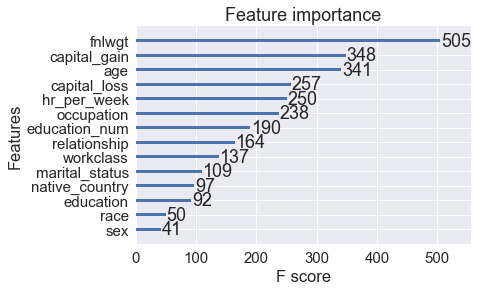

In [74]:
xgb.plot_importance(final_gb)

In [76]:
importances = final_gb.get_fscore()
importances

{'age': 341,
 'capital_gain': 348,
 'capital_loss': 257,
 'education': 92,
 'education_num': 190,
 'fnlwgt': 505,
 'hr_per_week': 250,
 'marital_status': 109,
 'native_country': 97,
 'occupation': 238,
 'race': 50,
 'relationship': 164,
 'sex': 41,
 'workclass': 137}

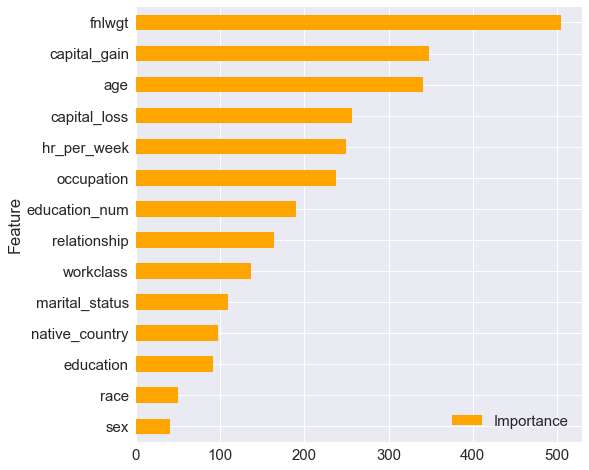

In [77]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [78]:
testdmat = xgb.DMatrix(final_test)

In [79]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([ 0.00279659,  0.20289436,  0.29114819, ...,  0.84031725,
        0.12937884,  0.77484399], dtype=float32)

In [80]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  1.,  0.,  1.], dtype=float32)

In [81]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.86852589641434264, 0.13147410358565736)

In [ ]:
final accuracy is 86.94%, or a 13.05% error rate. 